# **Slide 1**. 
Name, Surname, Student ID: Include your personal information on this slide.

# **Slide 2**. 
Download the following series from FRED and describe them:
- NA000334Q
- GDPDEF
- B230RC0Q173SBEA

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 40)
pd.set_option("display.precision", 2)

In [124]:
fred_key = '17193bb5d3d0af2508e249e344961fcf'
fred = Fred(api_key=fred_key)

In [125]:
def get_fred_data(code):
    return fred.get_series(code, frequency = 'q')

fred_codes = {'GDP' : 'NA000334Q',
              'Defl' : 'GDPDEF',
              'Pop' : 'B230RC0Q173SBEA'}

df = pd.DataFrame()

for var in fred_codes.keys():
    df[var] = get_fred_data(fred_codes[var])

In [126]:
df['Time'] = df.index
df.reset_index(drop = True, inplace=True)

In [127]:
df.head()

,GDP,Defl,Pop,Time
0,58497.0,11.95,143143.0,1947-01-01
1,60672.0,12.12,143790.0,1947-04-01
2,62196.0,12.33,144449.0,1947-07-01
3,68250.0,12.63,145122.0,1947-10-01
4,64258.0,12.73,145709.0,1948-01-01


### a) Have a brief sight to the data

(0.0, 6745124.0)

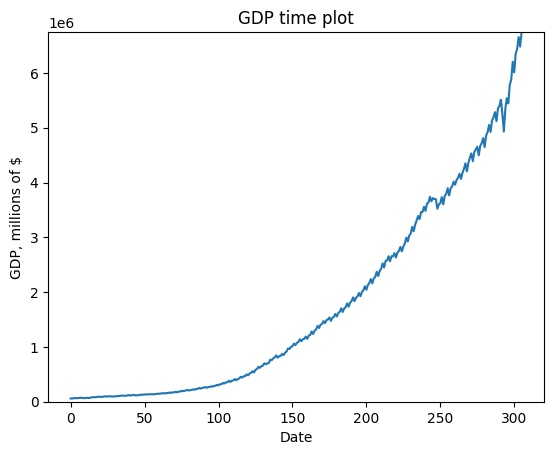

In [128]:
# plot the GDP series
gdp_max = df['GDP'].max()

plt.plot(df.index, df.GDP)
plt.title("GDP time plot")
plt.xlabel("Date")
plt.ylabel("GDP, millions of $")
plt.ylim(0, gdp_max)

Text(0, 0.5, 'Deflator')

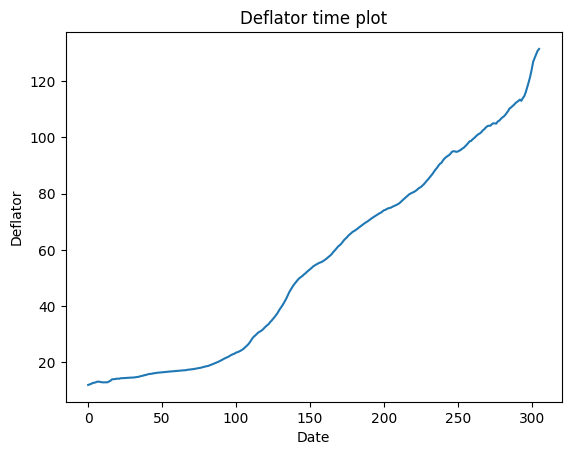

In [129]:
# plot the Defl series
plt.plot(df.index, df.Defl)
plt.title("Deflator time plot")
plt.xlabel("Date")
plt.ylabel("Deflator")

Text(0, 0.5, 'Population, thousands')

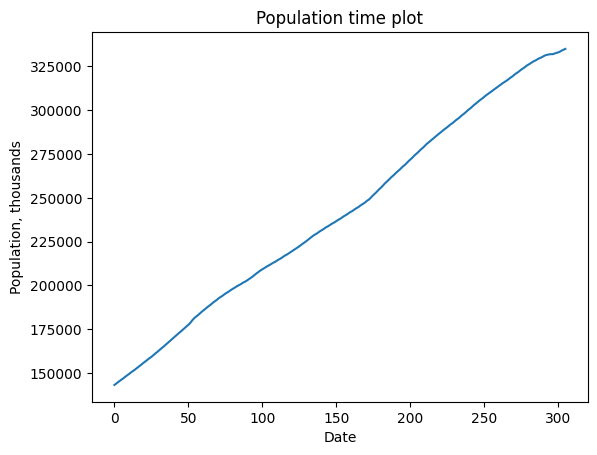

In [130]:
# plot the Defl series
plt.plot(df.index, df.Pop)
plt.title("Population time plot")
plt.xlabel("Date")
plt.ylabel("Population, thousands")

### b) Detect seasonality 

### **Comment:**

- all the series span from the 1947Q4 to 2023Q1. This means each series contains 306 observations (quarters).

- Series **GDP** shows an increasing trend, as well as some cycles. In fact there are cycles of expansion and decline. The data are in millions of dollars. Two significant troughs are visible: the one in 2008 and the one in 2020. One huge increase is visible after 2020, and considering it's nominal data, this may be due to inflation. In fact, deflator increased in the same time period.

- Series **Pop** shows an increasing trend. It doesn't seem to show cycles or seasonality. Moreover, the pattern is smooth and linear. The data are in thousands.

- series **Defl** is increasing, even though not linearly. We can spot a signifiant increase after 2020, probably as a consequence of inflation. Base year is 2012=100

# **Slide 3**
Focus on the sample from 1970 to 2022
- Compute real gross domestic product in per capita terms and plot it.
- Describe in one line the main patterns visible in the plot.

In [131]:
# check that Time is a datetime class
df.dtypes

# limit the span of the observations as requested
filtered_df = df.query(" Time >= '1970-04-01' and Time <= '2023-01-01'")

filtered_df.head()

,GDP,Defl,Pop,Time
93,268532.0,21.58,204721.0,1970-04-01
94,268019.0,21.75,205419.0,1970-07-01
95,282764.0,22.04,206130.0,1970-10-01
96,273782.0,22.38,206763.0,1971-01-01
97,291216.0,22.67,207362.0,1971-04-01


In [132]:
# compute real GDP
filtered_df['Real_GDP'] = (filtered_df['GDP']/filtered_df['Defl'])*100

# compute real GDP per capita
filtered_df['RGDP_capita'] = (filtered_df['Real_GDP']*1e6)/(filtered_df['Pop']*1e3)

filtered_df.head()

C:\Users\giord\AppData\Local\Temp\ipykernel_17544\1976194898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Real_GDP'] = (filtered_df['GDP']/filtered_df['Defl'])*100
C:\Users\giord\AppData\Local\Temp\ipykernel_17544\1976194898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RGDP_capita'] = (filtered_df['Real_GDP']*1e6)/(filtered_df['Pop']*1e3)


,GDP,Defl,Pop,Time,Real_GDP,RGDP_capita
93,268532.0,21.58,204721.0,1970-04-01,1.24e+06,6079.15
94,268019.0,21.75,205419.0,1970-07-01,1.23e+06,5997.72
95,282764.0,22.04,206130.0,1970-10-01,1.28e+06,6223.46
96,273782.0,22.38,206763.0,1971-01-01,1.22e+06,5917.65
97,291216.0,22.67,207362.0,1971-04-01,1.28e+06,6194.90


**`Strange values for 2022: only 15k as gdp per capita!!!!!`**

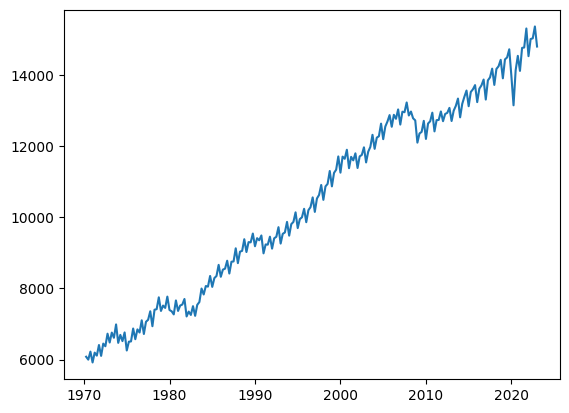

In [134]:
plt.plot(filtered_df.Time, filtered_df.RGDP_capita)

**Comment**:
- visible a long term increasing trend, 
- as well as cycles that last 5 years, 10 years sometimes. For instance, 1992-2003 roughly it's an expansion, while 2007-2009 is negative cycle
- seasonality